# Programming in Python
## Exam: July 5, 2021


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/3.3.1/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.5/), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [1]:
%matplotlib inline
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

### Exercise 1 (max 3 points)

You have to analyze the genome of *Seicercus examinandus* as collected by the US National Center for Biotechnology Information (NCBI Reference Sequence: NC_051526.1). You have the data in FASTA format: a text file in which the first line (starting with `>`) is a comment, then you get the genome data split over many lines. The name of the file is `nc_051526_1.fasta`.

Read the genome in a variable of type `str`.


In [2]:
genome: str

In [3]:
genome = ''

with open('nc_051526_1.fasta') as f_genome:
    for line in f_genome:
        if not line.startswith('>'):
            genome += line.strip('\n')

In [4]:
print(genome)
letters=set(genome)
print(letters)

GTCCCTGTAGCTTATATAAAGCATGACACTGAAGATGTCAAGATGGCTGTCACACACACCCAAGGACAAAAGACTTAGTCCTAACCTTACTGTTGGTTGTTGCTAGGGATATACATGCGAGTATCCGCGCGCCAGTGTAGACGCCCTGGGTACCCTAACACACTAGGTCGACAGGAGCAGGTATCAGGCACACCCACGCTGTAGCCCAAAACGCCTTGCAATTGCCACGCCCCCACGGGTTCTCAGCAGTAGTTAACATTAAGCAATGAGTGCAAACTTGACTTAGCCATAGCAATCTAGGGTCGGTCAATCCTGTGCCAGCCACCGCGGTCATACAGGAGACCCAAATCAACGTTATAACGGCGTAAAGAGTGGTCACATGCTATCTAAAGTAACTAAGATTAAAAGGTAACTGAGCTGTCATAAGCCCAAGATGCCCATAAGGCCTCCTACAAAGAAGATCTTAGACCAACGATTTATTGAAGCCCACGAAAGCCAGGGCCCAAACTGGGATTAGATACCCCACTATGCCTGGCCCTAAATCTTGATGCTCGATCTTACCGGAGCATCCGCCCGAGAACTACGAGCACCAACGCTTAAAACTCTAAGGACCTGGCGGTGTTCCAAACCCACCTAGAGGAGCCTGTTCTGTAATCGATGATCCACGATATACCTGACCATTCCTTGCCAAATCAGCCTATATACCGCCGTCGCCAGCCCACCCAGCATGAAGGCCCAACAGTGGACGCAATAGCCCTACCGCGCTAATACGACAGGTCAAGGTATAGCCCATGGAATGGAAGCAATGGGCTACATTTTCTAAGATAGAACACAACGGCAAAGGGATATGAAACTGCCCCTGGAAGGAGGATTTAGCAGTAAAGTGGGACAATCGAGCCCTCTTTAAGCCGGCCCTGGAGCACGTACATACCGCCCGTCGCCCTCATCAAAAGCGACCCCCCCCCCCCATACCTAATAAGCTACGCAGCCGAAGATGAGG

### Exercise 2 (max 5 points)

Consider the set of the letters appearing in the genome string. Compute all the triplets that can be composed by using these letters (for example: `'AAC'`), by considering each and its reverse only once: for example, only one between `'AAC'` and `'CAA'` should appear in the result. Name the result `possible_triplets`.

In [7]:
letters = set(genome)
possible_triplets = set()
for a in letters:
    for b in letters:
        for c in letters:
            triplet = a+b+c
            rev_triplet = c+b+a
            if not rev_triplet in possible_triplets: 
                possible_triplets.add(triplet)

In [13]:
possible_triplets, len(possible_triplets)

({'AAA',
  'ACA',
  'AGA',
  'ATA',
  'CAA',
  'CAC',
  'CAG',
  'CAT',
  'CCA',
  'CCC',
  'CCG',
  'CCT',
  'CGA',
  'CGC',
  'CGG',
  'CGT',
  'CTA',
  'CTC',
  'CTG',
  'CTT',
  'GAA',
  'GAG',
  'GCA',
  'GCG',
  'GGA',
  'GGG',
  'GTA',
  'GTG',
  'TAA',
  'TAG',
  'TAT',
  'TCA',
  'TCG',
  'TCT',
  'TGA',
  'TGG',
  'TGT',
  'TTA',
  'TTG',
  'TTT'},
 40)

### Exercise 3 (max 7 points)

Define a function which takes a string of arbitrary length ($\ge 3$) and a triplet, and returns the number of occurrences of the triplet or its reverse in the string. For example the triplet `'AAT'` occurs three times (twice as `'AAT'` and once as `'TAA'`) in `'CAATAATCC'` and the triplet `'AAA'` occurs five times in `'AAAAAAA'`.

To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.

In [8]:
def num_triplets(s: str, triplet: str) -> int:
    """Return the number of times triplet or its reverse occurs in s.
    
    >>> num_triplets('CAATAATCC', 'AAT')
    3
    >>> num_triplets('CAATAATCC', 'TAA')
    3
    >>> num_triplets('AAAAAAA', 'AAA')
    5
    """
    assert len(s) >= 3 and len(triplet) == 3
    
    rev_triplet = triplet[-1::-1]
    res = 0
    for i in range(0, len(s)-2):
        if s[i:i+3] == triplet or s[i:i+3] == rev_triplet:
            res = res + 1
    return res

### Exercise 4 (max 4 points)

Define a pandas DataFrame indexed by the possible triplets identified in Exercise 2, with a column reporting the occurrences of each triplet in the genome under analysis. For example, the triplet `'AAA'` should have 446 occurrences.

In [9]:
df = pd.DataFrame(index=possible_triplets, columns=['num'])
df['num'] = df.index.map(lambda x: num_triplets(genome,x))

In [10]:
assert df.loc['AAA']['num'] == 446

### Exercise 5 (max 2 points)

Add a column to the dataframe with values `True` if the number of occurrences is even, and `False` otherwise.

In [11]:
df['parity'] = df['num'] % 2 == 0
df

,num,parity
TTT,167,False
TCT,309,False
GAG,161,False
GAC,437,False
TGA,375,False
CTA,966,True
TTA,414,True
GCA,357,False
GTG,68,True
GTA,350,True


In [12]:
z=df['num'].loc[df['parity']==True]
z

CTA    966
TTA    414
GTG     68
GTA    350
ATA    244
GCC    538
CAC    426
AGA    192
GGC    282
CGC    160
TAT    222
GAA    456
ACA    426
GGT    198
GCG     64
CCC    672
GGA    356
GTC    344
AAA    446
Name: num, dtype: int64

In [13]:
x=df.query('parity==True')
x

,num,parity
CTA,966,True
TTA,414,True
GTG,68,True
GTA,350,True
ATA,244,True
GCC,538,True
CAC,426,True
AGA,192,True
GGC,282,True
CGC,160,True


### Exercise 6 (max 5 points)


Plot the histograms of occurrences, one for the triplets occuring an even number of times (let's call them "even triplets"), one for the others. Add to the plot two horizontal lines: one for the mean number of occurences for "even triplets" and one for the mean number of occurrences for the others. 

In [14]:
a=df['num'].loc[df['parity']==True]
b=df['num'].loc[df['parity']==False]

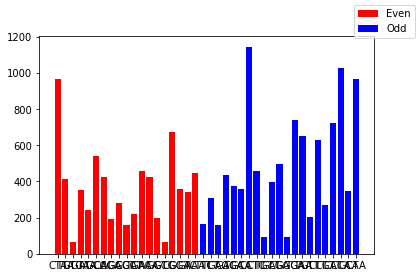

In [23]:
fig, ax = plt.subplots()
ax.bar(a.index, a, label='Even',color='red')
ax.bar(b.index, b, label='Odd',color='blue')
_ = fig.legend()

Object `.bar()` not found.


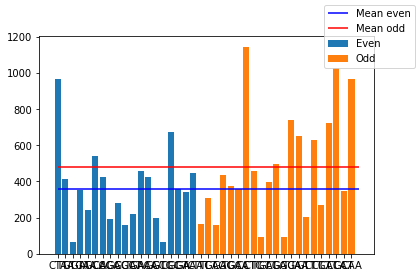

In [16]:
even = df.query('parity == True')['num']
odd = df.query('parity == False')['num']

fig, ax = plt.subplots()
ax.bar(even.index, even, label='Even')
ax.hlines(even.mean(), 0, len(df), label='Mean even', color='b')
ax.bar(odd.index, odd, label='Odd')
ax.hlines(odd.mean(), 0, len(df), label='Mean odd', color='r')
_ = fig.legend()


### Exercise 7 (max 3 points)

Add a column with the "standardized number of occurrences" of each triplet. The *standardized number of occurrences* is defined as the difference between a value and the mean over all the values, divided by the standard deviation over all the values. Check that the resulting values have mean approximately equal to 0, and standard deviation approximately equal to 1. 

In [17]:
df['std_num'] = (df['num'] - df['num'].mean()) / df['num'].std()

In [18]:
assert (df['std_num'].mean() - 0) < 1e-10
assert (df['std_num'].std() - 1) < 1e-10

### Exercise 8 (max 4 points)

Consider this statistical model: the *standardized number of occurrences* of even and not even triplets is normally distributed, with an unknown mean, and a standard deviation of 1. Your *a priori* estimation of the mean for both distribution is a normal distribution with mean 0 and standard deviation 2. Use PyMC to sample the posterior distributions after having seen the actual values for even and not even triplets.  Plot the results.

In [19]:
mymodel = pm.Model()

with mymodel:
    
    mu_e = pm.Normal('mu_e',0,2)
    mu_o = pm.Normal('mu_o',0,2)
    
    e = pm.Normal('e', mu_e , 1 , observed = df.query('parity == True')['std_num'] )
    o =  pm.Normal('o', mu_o , 1 , observed = df.query('parity == False')['std_num'] )
    
    post = pm.sample(return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_o, mu_e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [19]:
mymodel = pm.Model()

with mymodel:
    mu_e = pm.Normal('mu_e', 0, 2)
    mu_o = pm.Normal('mu_o', 0, 2)
    


    e = pm.Normal('e', mu_e, 1, observed=df.query('parity == True')['std_num'])
    o = pm.Normal('o', mu_o, 1, observed=df.query('parity == False')['std_num'])
    
    post = pm.sample()
    

<ipython-input-19-d60e652d42f2>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  post = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_o, mu_e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


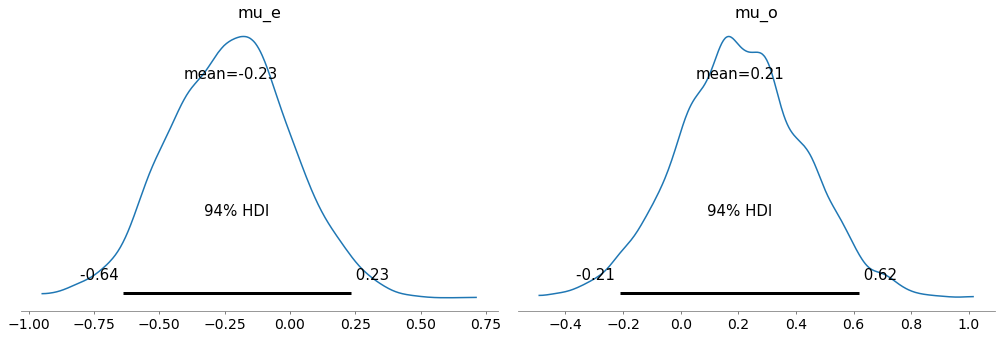

In [18]:
with mymodel:
    pm.plot_posterior(post)